# Battle of the Neighbourhoods - final project
### Applied Data Science Capstone by IBM/Coursera

## 1. Introduction and Background

### The problem:

We are looking to open a new coffee shop in the city bowl of Cape Town (South Africa). We would like to determine the most ideal location to open their coffee shop. We have three key requirements that need to be met when find the best location:
1. There must be high foot traffic in the vacinity of our shop to maximize number of potential buyers
2. There must be few other coffee stores to minimize competition
3. There must be surrounding stores/services to further maximize foot traffic

These points are ordered according to the priority of the requirement being met. This means that, for example, for the purpose of our shop, high foot traffic is the most import factor to considering when determining where to locate our store, then the number of competitors, followed by the surrounding stores. What this means is that we are willing to indure a certain level of competitors for the chance of having higher foot traffic, and therefore, more customers.

Ideally, we want a location that has high foot traffic, low competition and surrounding businesses that will attrach more customers to our store.

### Background:

The Cape Town city bowl is one of the main tourist hotspots in the City of Cape Town Region for this reason there are many restaurants, fast food places, coffee shops and even informal markets that people are able to receive food and drinks. 

Based on the location requirements we have sent above we will use the following methods to determine the best location for our new shop.
1. To find the most foot traffic we will take transportation infrastructure into account i.e. rail, bus, taxi, cab, etc. and determine what are the central points that people "gather" in.
2. We will locate the corporate brands such as Settle Coffee, Mugg and Bean as low-cost competition stores as well as independatly owned coffee stores such as Xpresso, determine their locations and find a location that has the lowest competition.
3. We will consider places in the CBD such as shopping malls, banks, plazas, etc for areas that may have the large amount of locals and museums, art gallaries and other types of tourist locations to determine which areas will have the most amount of tourists. 

### Additional points:
* For the purpose of this investigation, we will be focusing on only stores that are considered exclusively coffee shops. While restaurants and fast food joints do provide coffee as one of the goods they sell, we will not be considering them for the investigation because their primary sale items are foods.
* Nightlife locations such as bars will also not be taken into consideration as most of them are only open _after_ our stores operational hours.
* One of the issues of the second point in the problem statement "There must be few other coffee stores to minimize competition" is that sometimes competitors actually bring people into the area and locating our store away from competitors might also move us away from potential high foot traffic areas.


## 2. Description of data and data sources

For this investigation we will be looking at several different datasets. 

### 2.1 Suburbs in the Cape Town City bowl - suburb data
First, we will evaluate the suburbs in the City bowl area by pulling in the suburb list from Wikipedia (https://en.wikipedia.org/wiki/List_of_Cape_Town_suburbs) using the third table to map out the suburbs. This data in not complex and will simply consists of the 16 surburb names and their respective Street Code. 

*Wikipedia City bowl data:*
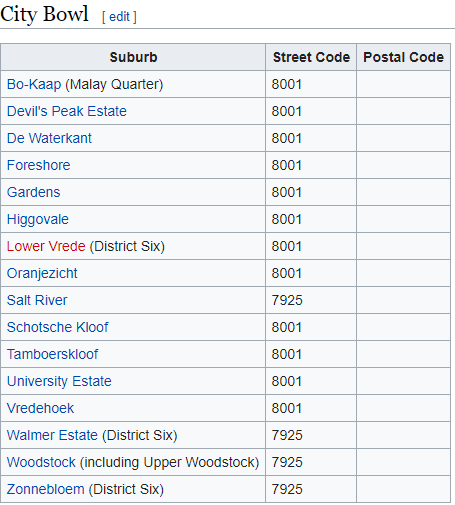

### 2.2 Suburbs in Cape Town City bowl - coordinate data
Next, we will add more information to the previous data list using an excel file that contains the longitude and latitude of the 16 above-mentioned suburbs. Again this is also not a complex dataset, consisting of only the suburb name, latitude and longitude details. 

Normally, we would join the data mentioned in point 1 and the data in point 2 on Street Code but because majority of the suburbs have the same Street Code (because we are looking at such a centralized location) it is not a unique identifier. We will use suburb instead to allow for more accurate joining and, therefore, coordinate data. 

### 2.3 Transportation routes
Next, using the Transportation categories Parking [4c38df4de52ce0d596b336e1] and Travel & Transport [4d4b7105d754a06379d81259] in the Foursquare API, we will determine the transport routes avaliable to see which areas have a high foot traffic within the city bowl. The assumption is that the more transportation routes feed into a specific area the more likely it is that there will be a high density of people moving from drop-off location to desired location. 

### 2.4 Local coffee shops
After that, we will evalute coffee shops in the city bowl to determine the high density areas. Again, we will use the Foursquare API to pull in this information using the category Coffee Shop [4bf58dd8d48988d1e0931735]. This will allow us to assess locations with a high density of coffee stores and consider if it makes sense to be locate near the competition or far away. We will do this by evaluating what surrounds these stores and if area is to densily populated with coffee shops for our store to have a market edge.

### 2.5 Surrounding businesses 
Lastly, we will consider the coffee stores mentioned in the above point 4 and determine if there are any commonalities to what is located in their surroundings, if there are areas we can find that have high foot traffic (determined in point 3) and if there are areas that have similar businesses to those found surrounding the other coffee stores central locations. We will use Arts & Entertainment [4d4b7104d754a06370d81259] (this is to identify tourist hotspots) and use Professional & Other Places [4d4b7105d754a06375d81259], Office [4bf58dd8d48988d124941735], School [4bf58dd8d48988d13b941735] and Shop & Service [4d4b7105d754a06378d81259] (to identify students and professionals hotspots).


Using the datasets in points 3 - 5 we should be able to identity 1 or more location that closely resembles our ideal store location that has high foot traffic, low competition and surrounding businesses that will attrach more customers to our store. As previously stated, we are willing to sacrifice low competition area for one that has higher foot traffic and surrounding businesses. 

### Additional Note:

* All data mentioned in points 3 - 5 will consist only of the name, category, location (either address details or co-ordinante data). 

## 3. Methology

First we start with pulling in the necessary Python libraries.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

Next we get the data of the Cape Town City Bowl suburb data from Wikipedia and format it to 

In [5]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Cape_Town_suburbs')[2]
df.shape

(16, 3)

In [6]:
df.head()

,Suburb,Street Code,Postal Code
0,Bo-Kaap (Malay Quarter),8001,NaN
1,Devil's Peak Estate,8001,NaN
2,De Waterkant,8001,NaN
3,Foreshore,8001,NaN
4,Gardens,8001,NaN


In [8]:
# The code was removed by Watson Studio for sharing.

,Suburb,Latitude,Longitude
0,Bo-Kaap (Malay Quarter),-33.921420,18.415560
1,Devil's Peak Estate,-33.937327,18.430816
2,De Waterkant,-33.915451,18.419519
3,Foreshore,-33.921934,18.439409
4,Gardens,-33.934388,18.408160


In [9]:
full_data = df.join(df_data_1.set_index('Suburb'), on='Suburb')
full_data.head()

,Suburb,Street Code,Postal Code,Latitude,Longitude
0,Bo-Kaap (Malay Quarter),8001,NaN,-33.921420,18.415560
1,Devil's Peak Estate,8001,NaN,-33.937327,18.430816
2,De Waterkant,8001,NaN,-33.915451,18.419519
3,Foreshore,8001,NaN,-33.921934,18.439409
4,Gardens,8001,NaN,-33.934388,18.408160


In [10]:
full_data.shape

(16, 5)

In [29]:
# Get corrdinates for Cape Town

address = 'Cape Town, WC'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cape Town are {}, {}.'.format(latitude, longitude))


CapeTown_Centre = [latitude, longitude]

The geograpical coordinate of Cape Town are -33.928992, 18.417396.


In [30]:
CapeTown_Centre

[-33.928992, 18.417396]

In [31]:
#Generate map of Cape town
map_CT = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, borough, neighborhood in zip(full_data['Latitude'], full_data['Longitude'], full_data['Street Code'], full_data['Suburb']):
    label = '{}, {}'.format('Suburb', 'Street Code')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CT)  
    
map_CT

In [42]:
CLIENT_ID = 'F0STA2MIZTR0ER15COYFVE0PQ3VMYEWHLF0EGKCRLW0RR3L3' # your Foursquare ID
CLIENT_SECRET = '23ZTC5MUIL1ZEOZ2W1JGOGEULDTIM4MB1NUVG4GXT5QEY2GN' # your Foursquare Secret
VERSION = '20200717' # Foursquare API version

In [91]:
# Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

coffee_categories = ['4bf58dd8d48988d1e0931735', '4bf58dd8d48988d16d941735']

def is_coffee_shop(categories, specific_filter=None):
    coffee_words = ['cafe', 'coffee']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Suid Afrika', '')
    address = address.replace(', South Africa', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=5000, limit=1000):
    version = '20200717'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, latitude, longitude, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [92]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f11a361915b8a1e85f7cfa7'},
 'response': {'venues': [{'id': '5ddf97ae91dc9d0007763a6d',
    'name': 'Shift Espresso Bar',
    'location': {'address': 'Temple House',
     'crossStreet': 'Buitenkant Street',
     'lat': -33.929508,
     'lng': 18.421609,
     'labeledLatLngs': [{'label': 'display',
       'lat': -33.929508,
       'lng': 18.421609}],
     'distance': 393,
     'postalCode': '8001',
     'cc': 'ZA',
     'city': 'iKapa',
     'state': 'Western Cape',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['Temple House (Buitenkant Street)',
      'iKapa',
      '8001',
      'iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594991886',
    'hasPerk':

In [93]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [94]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
Coffeeshops = json_normalize(venues)
Coffeeshops.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5ddf97ae91dc9d0007763a6d,Temple House,ZA,iKapa,iNingizimu Afrika,Buitenkant Street,393,"[Temple House (Buitenkant Street), iKapa, 8001...","[{'label': 'display', 'lat': -33.929508, 'lng'...",-33.929508,18.421609,NaN,8001,Western Cape,Shift Espresso Bar,v-1594991886,NaN
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,50123ab3e4b0f8ec77991df4,171A Buitenkant Street,ZA,iKapa,iNingizimu Afrika,Buitenkant,531,"[171A Buitenkant Street (Buitenkant), iKapa, 8...","[{'label': 'display', 'lat': -33.933453, 'lng'...",-33.933453,18.419453,Gardens,8001,Western Cape,Deluxe Coffeeworks,v-1594991886,NaN
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5680ebf7498ea638fca300f5,Bree st,ZA,Cape Town CBD - Foreshore,iNingizimu Afrika,Strand,1055,"[Bree st (Strand), Cape Town CBD - Foreshore, ...","[{'label': 'display', 'lat': -33.9197162415488...",-33.919716,18.419760,NaN,8000,Western Cape,Dapper Coffee Co.,v-1594991886,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,56a92621498ec39c6d1af9f9,"Touchstone House, 8 Bree Str",ZA,iKapa,iNingizimu Afrika,NaN,1351,"[Touchstone House, 8 Bree Str, iKapa, iNingizi...","[{'label': 'display', 'lat': -33.9175347227082...",-33.917535,18.422235,Cape Town CBD - Foreshore,NaN,Western Cape,Folk Coffee Anthropology,v-1594991886,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,56290afc498ed13555594e00,63 Loop Street,ZA,iKapa,iNingizimu Afrika,NaN,902,"[63 Loop Street, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9210905035966...",-33.921091,18.419561,Cape Town CBD - Foreshore,NaN,Western Cape,Yourstruly,v-1594991886,NaN


In [95]:
Coffeeshops.shape

(49, 19)

In [96]:
filtered_columns = ['name', 'categories'] + [col for col in Coffeeshops.columns if col.startswith('location.')] + ['id']
Coffeeshops_filtered = Coffeeshops.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
Coffeeshops_filtered['categories'] = Coffeeshops_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Coffeeshops_filtered.columns = [column.split('.')[-1] for column in Coffeeshops_filtered.columns]

Coffeeshops_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Shift Espresso Bar,Coffee Shop,Temple House,ZA,iKapa,iNingizimu Afrika,Buitenkant Street,393,"[Temple House (Buitenkant Street), iKapa, 8001...","[{'label': 'display', 'lat': -33.929508, 'lng'...",-33.929508,18.421609,NaN,8001,Western Cape,5ddf97ae91dc9d0007763a6d
1,Deluxe Coffeeworks,Coffee Shop,171A Buitenkant Street,ZA,iKapa,iNingizimu Afrika,Buitenkant,531,"[171A Buitenkant Street (Buitenkant), iKapa, 8...","[{'label': 'display', 'lat': -33.933453, 'lng'...",-33.933453,18.419453,Gardens,8001,Western Cape,50123ab3e4b0f8ec77991df4
2,Dapper Coffee Co.,Coffee Shop,Bree st,ZA,Cape Town CBD - Foreshore,iNingizimu Afrika,Strand,1055,"[Bree st (Strand), Cape Town CBD - Foreshore, ...","[{'label': 'display', 'lat': -33.9197162415488...",-33.919716,18.419760,NaN,8000,Western Cape,5680ebf7498ea638fca300f5
3,Folk Coffee Anthropology,Coffee Shop,"Touchstone House, 8 Bree Str",ZA,iKapa,iNingizimu Afrika,NaN,1351,"[Touchstone House, 8 Bree Str, iKapa, iNingizi...","[{'label': 'display', 'lat': -33.9175347227082...",-33.917535,18.422235,Cape Town CBD - Foreshore,NaN,Western Cape,56a92621498ec39c6d1af9f9
4,Yourstruly,Coffee Shop,63 Loop Street,ZA,iKapa,iNingizimu Afrika,NaN,902,"[63 Loop Street, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9210905035966...",-33.921091,18.419561,Cape Town CBD - Foreshore,NaN,Western Cape,56290afc498ed13555594e00
5,Knead Bakery,Bakery,Kloof St.,ZA,iKapa,iNingizimu Afrika,NaN,574,"[Kloof St., iKapa, 8001, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9294985608820...",-33.929499,18.411204,NaN,8001,Western Cape,4ee72f10d3e34ebcf25c1dc8
6,Bootlegger Coffee Company,Coffee Shop,37 Main Road,ZA,iKapa,iNingizimu Afrika,NaN,2201,"[37 Main Road, iKapa, 8051, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9095039617731...",-33.909504,18.413369,NaN,8051,Western Cape,59ef4d0f92e7a94da77d450f
7,Vida É Caffe,Coffee Shop,Gardens Centre,ZA,iKapa,iNingizimu Afrika,NaN,574,"[Gardens Centre, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9341335635713...",-33.934134,18.417918,NaN,NaN,Western Cape,52c14f83498e31d38761c3ff
8,Woodstock Moto Co,Auto Garage,7 Barron Street,ZA,iKapa,iNingizimu Afrika,NaN,2342,"[7 Barron Street, iKapa, 7925, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.926814, 'lng'...",-33.926814,18.442618,NaN,7925,Western Cape,5c7e6bde51950e002c924403
9,vida e caffe,Coffee Shop,Piazza St. John,ZA,NaN,iNingizimu Afrika,NaN,2987,"[Piazza St. John, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9176077200602...",-33.917608,18.388102,NaN,NaN,NaN,52bbe4be498e716407f19e30


In [97]:
from folium import Map, CircleMarker

# add the Coffee shops restaurants as blue circle markers
for lat, lng, label in zip(Coffeeshops_filtered.lat,Coffeeshops_filtered.lng, Coffeeshops_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=folium.Popup(label),
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_CT)

# display map
map_CT


In [ ]:
# Let's now go over our neighborhood locations and get nearby restaurants; we'll also maintain a dictionary of all found restaurants and all found italian restaurants

import pickle

def get_restaurants(lats, lons):
    restaurants = {}
    italian_restaurants = {}
    location_restaurants = []

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, food_category, foursquare_client_id, foursquare_client_secret, radius=350, limit=100)
        area_restaurants = []
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            is_res, is_italian = is_restaurant(venue_categories, specific_filter=italian_restaurant_categories)
            if is_res:
                x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
                restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, is_italian, x, y)
                if venue_distance<=300:
                    area_restaurants.append(restaurant)
                restaurants[venue_id] = restaurant
                if is_italian:
                    italian_restaurants[venue_id] = restaurant
        location_restaurants.append(area_restaurants)
        print(' .', end='')
    print(' done.')
    return restaurants, italian_restaurants, location_restaurants

# Try to load from local file system in case we did this before
restaurants = {}
italian_restaurants = {}
location_restaurants = []
loaded = False
try:
    with open('restaurants_350.pkl', 'rb') as f:
        restaurants = pickle.load(f)
    with open('italian_restaurants_350.pkl', 'rb') as f:
        italian_restaurants = pickle.load(f)
    with open('location_restaurants_350.pkl', 'rb') as f:
        location_restaurants = pickle.load(f)
    print('Restaurant data loaded.')
    loaded = True
except:
    pass

# If load failed use the Foursquare API to get the data
if not loaded:
    restaurants, italian_restaurants, location_restaurants = get_restaurants(latitudes, longitudes)
    
    # Let's persists this in local file system
    with open('restaurants_350.pkl', 'wb') as f:
        pickle.dump(restaurants, f)
    with open('italian_restaurants_350.pkl', 'wb') as f:
        pickle.dump(italian_restaurants, f)
    with open('location_restaurants_350.pkl', 'wb') as f:
        pickle.dump(location_restaurants, f)
        

### 4. Results

### 5. Discussion

### 6. Conclusion